# Importing Necessary Libraries

In [64]:
import pandas as pd
import numpy as np
import datetime

#Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Understanding Data

In [2]:
#Reading the Data Dictionary to understand the meaning of the columns bein used.
LoanDataDic = pd.read_excel("Data_Dictionary.xlsx","LoanStats")
# Increase the width of displayed columns
pd.set_option('display.max_colwidth', 50)

print(LoanDataDic)

               LoanStatNew                                        Description
0           acc_now_delinq  The number of accounts on which the borrower i...
1     acc_open_past_24mths         Number of trades opened in past 24 months.
2               addr_state  The state provided by the borrower in the loan...
3                 all_util              Balance to credit limit on all trades
4               annual_inc  The self-reported annual income provided by th...
..                     ...                                                ...
112    verification_status  Indicates if income was verified by LC, not ve...
113  verified_status_joint  Indicates if the co-borrowers' joint income wa...
114               zip_code  The first 3 numbers of the zip code provided b...
115                    NaN                                                NaN
116                    NaN  * Employer Title replaces Employer Name for al...

[117 rows x 2 columns]


1. Delinquency means defaulting on loan
2. Loan grade - From A-D grades are assigned - defining how risky the applicant is and higher the grade - lesser the interest.
3. DTI - Debt to income ratio - lesser the DTI - Good for the bank

# Fetching Data

In [3]:
#Reading csv data file in chunks to conserve memory - deafult option
#LoanData_orignial = pd.read_csv("loan.csv")
#print(LoanData_orignial.info())

#We got an warning while executing above code - DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
#Since our data set is small and memory usage is same for both low_mory true and false. so we can set low_memory as false & load all data at once. 

LoanData = pd.read_csv("loan.csv", low_memory=False)
print(LoanData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


We have total 39717 Rows and 111 Columns in the dataset. 

In [4]:
#Storing them in variable. 
RowCount = LoanData.shape[0]
ColCount = LoanData.shape[1]
print(RowCount,ColCount)

39717 111


In [5]:
print(LoanData.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [6]:
print(LoanData.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


## Fixing Rows and Columns

In [7]:
#There are total 39717 rows & 111 columns - checking if there are any duplicates 
LoanData.drop_duplicates().shape

(39717, 111)

since the shape is same as original means - no duplicate are present

### Fixing Rows


In [8]:
print(LoanData.isnull().all(axis=1).sum())

0


There are no rows with all values as null

In [9]:
#Removing rows where loan status is current since we want to analyze rows where loan is defaulted & factors affecting them
LoanData.drop(LoanData[LoanData['loan_status'] == "Current"].index, inplace = True)
print("Dataset after dropping rows based on loan status Current : ", LoanData.shape)

Dataset after dropping rows based on loan status Current :  (38577, 111)


### Fixing Columns

In [10]:
print("Num of columns with 100% null values ", LoanData.isnull().all(axis=0).sum())

Num of columns with 100% null values  55


There are total 54 columns out of 111 where all values are null. hence removing them. 

In [11]:
#Removing all the columns with null values 
LoanData = LoanData.dropna(axis=1, how='all')
print("Data Frame shape after removing columns with all values null",LoanData.shape)

Data Frame shape after removing columns with all values null (38577, 56)


Total 57 columns are left are removing null values. 

In [12]:
#Finding & Analysing other columns which have more than 50 - 75% null values- whether they are required or not

#50%
print("Num of columns with 50% null values ",LoanData.columns[((LoanData.isnull().sum())/len(LoanData)) > 0.50])
#75%
print("Num of columns with 75% null values ",LoanData.columns[((LoanData.isnull().sum())/len(LoanData)) > 0.75])

#Since mths_since_last_delinq defines - when was the last time the person missed a payment on the loan - so it might be beneficial - keeping it for now. 
#Removing columns with more than 55% null values. 
LoanData = LoanData.drop(['mths_since_last_record','mths_since_last_delinq'],axis = 1)

print("Data Frame shape after removing null columns",LoanData.shape)

Num of columns with 50% null values  Index(['mths_since_last_delinq', 'mths_since_last_record'], dtype='object')
Num of columns with 75% null values  Index(['mths_since_last_record'], dtype='object')
Data Frame shape after removing null columns (38577, 54)


In [13]:
#Analysing more columns if there are relevant or not and then removing accordingly
print("Columns left ",LoanData.columns)

Columns left  Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [14]:
#Columns having only one values
print("Unique values in Columns ",LoanData.columns[LoanData.nunique()<2])

Unique values in Columns  Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')


In [15]:
#Are there members who have taken more than 1 loan in the sheet (id and member id)
print(LoanData['member_id'].duplicated().sum())
#There is no row where loan is repeated by a member and id, member id both are unique values so we can remove it. 

#url: since it is the link directing to the dataset from the website. 
#zip_code: Its masked 
#emp_title, desc, title, last_pymnt_amnt, recoveries, revol_util, collection_recovery_fee, last_pymnt_amnt: info less relevant to our problem statement
#total_acc,total_rec_prncp,total_rec_late_fee, total_rec_int, total_pymnt: removing total columns
#Date columns:last_pymnt_d,last_credit_pull_d, issue_d
#total_pymnt_inv, funded_amnt_inv -we can remove these as they are amount invested by investors and more internal. 


0


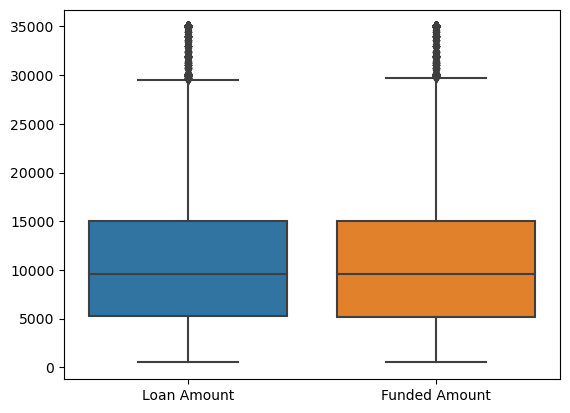

In [16]:
#Comparing loan_amnt and funded amnt and see if both are equal 
sns.boxplot(data=[LoanData.loan_amnt, LoanData.funded_amnt])
plt.xticks(ticks=[0, 1], labels=['Loan Amount', 'Funded Amount'])
plt.show()

Since both of them are almost equal so we can use either one. Taking Loan amount for further analysis. 

In [17]:
#Deleting columns based on above domain and data analysis with the help of data dictionary. 
delete_columns = ["id","member_id","url","zip_code","pymnt_plan","initial_list_status","out_prncp","out_prncp_inv","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens","emp_title","desc","title","total_acc","total_rec_prncp","total_rec_late_fee","total_rec_int","last_pymnt_d","last_credit_pull_d","issue_d","earliest_cr_line","inq_last_6mths","revol_util","recoveries", "last_pymnt_amnt","collection_recovery_fee","funded_amnt_inv","total_pymnt_inv","total_pymnt","funded_amnt"]
LoanData = LoanData.drop(labels = delete_columns,axis = 1)

In [18]:
#Remaining Columns
print(LoanData.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'open_acc', 'pub_rec', 'revol_bal', 'pub_rec_bankruptcies'],
      dtype='object')


### Fill Missing values

In [19]:
#Finding if there left columns have any missing values or not
print(LoanData.isnull().sum())

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
open_acc                   0
pub_rec                    0
revol_bal                  0
pub_rec_bankruptcies     697
dtype: int64


#### emp_length
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [20]:
print("Null Values before filling missing values", LoanData['emp_length'].isna().sum())
LoanData['emp_length'].fillna('0 years',inplace=True)
print("Null Values after filling missing values", LoanData['emp_length'].isna().sum())

Null Values before filling missing values 1033
Null Values after filling missing values 0


#### pub_rec_bankruptcies
Number of public record bankruptcies

In [21]:
print("Null Values before filling missing values", LoanData['pub_rec_bankruptcies'].isna().sum())
LoanData['pub_rec_bankruptcies'].fillna('0',inplace=True)
print("Null Values after filling missing values", LoanData['pub_rec_bankruptcies'].isna().sum())

#Replacing NA with 0 assuming - they would not have any public record for bankruptcies

Null Values before filling missing values 697
Null Values after filling missing values 0


In [22]:
#Verifying if there left columns have any missing values or not
print(LoanData.isnull().sum())

#None left after working on missing values. 

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
open_acc                0
pub_rec                 0
revol_bal               0
pub_rec_bankruptcies    0
dtype: int64


### Normalizing Values

In [23]:
#Printing few columns to have a look at data to Normalizing.
print(LoanData.head(10))

#After analysis - Normalizing term, int_rate, emp_length

    loan_amnt        term int_rate  installment grade sub_grade emp_length  \
0        5000   36 months   10.65%       162.87     B        B2  10+ years   
1        2500   60 months   15.27%        59.83     C        C4   < 1 year   
2        2400   36 months   15.96%        84.33     C        C5  10+ years   
3       10000   36 months   13.49%       339.31     C        C1  10+ years   
5        5000   36 months    7.90%       156.46     A        A4    3 years   
6        7000   60 months   15.96%       170.08     C        C5    8 years   
7        3000   36 months   18.64%       109.43     E        E1    9 years   
8        5600   60 months   21.28%       152.39     F        F2    4 years   
9        5375   60 months   12.69%       121.45     B        B5   < 1 year   
10       6500   60 months   14.65%       153.45     C        C3    5 years   

   home_ownership  annual_inc verification_status  loan_status  \
0            RENT     24000.0            Verified   Fully Paid   
1        

In [24]:
#Removing years/year from the emp_length and making 10+ as 10 and <1 as 1
LoanData['emp_length'] = LoanData['emp_length'].str.extract('(\d+)').astype(int)

print(LoanData['emp_length'].value_counts())

emp_length
10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: count, dtype: int64


In [25]:
#Removing % from the int_rate
LoanData['int_rate'] = LoanData['int_rate'].str.replace('%','').astype(float)
print(LoanData['int_rate'].value_counts())

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64


In [26]:
#Removing months from the term
LoanData['term'] = LoanData['term'].str.replace('months','').astype(int)
print(LoanData['term'].value_counts())

term
36    29096
60     9481
Name: count, dtype: int64


In [27]:
print(LoanData.dtypes)
#When data type is object that means there is present of error values due to which panda is unable categorise them into normal data types. 

loan_amnt                 int64
term                      int32
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int32
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
pub_rec_bankruptcies     object
dtype: object


### Outliers treatment

In [28]:
#Clubbing our variables into numerical and categorical on above basis. 
numerical_columns = ['loan_amnt','term','int_rate','installment','emp_length','annual_inc','dti','delinq_2yrs','open_acc','pub_rec','revol_bal']
Categorical_columns = ['grade','sub_grade','home_ownership','purpose','verification_status','loan_status','addr_state','pub_rec_bankruptcies']

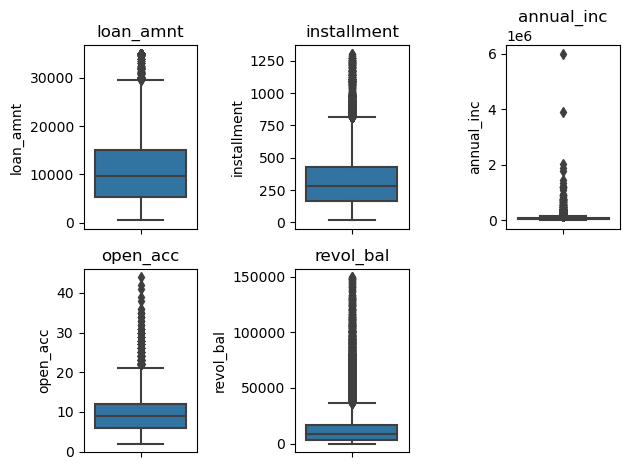

In [29]:
#Check the boxplots of numerical specific columns to detect the presence of outliers
#Removing term -because it only has 2 values, emp_length - as we already saw earlier - values till 10 only and also pub_rec (values only till 4). 
OutlierColumns =  ['loan_amnt','installment','annual_inc','open_acc','revol_bal']
for i, j in enumerate(LoanData[OutlierColumns]):
    plt.subplot(2,3,i+1)
    sns.boxplot(y = j, data = LoanData)
    plt.title(j)
    plt.tight_layout()

In [30]:
#Check the 99th perceptile for each column
for i in LoanData[OutlierColumns]:
    print("99th percentile of",i,"is",LoanData[i].quantile(.99).round(2))

99th percentile of loan_amnt is 35000.0
99th percentile of installment is 931.09
99th percentile of annual_inc is 234144.0
99th percentile of open_acc is 22.0
99th percentile of revol_bal is 83276.72


In [31]:
#Count the outlier that are above 99th percentile or below 1st percentile
((LoanData[OutlierColumns] > LoanData[OutlierColumns].quantile(.99)) | (LoanData[OutlierColumns] < LoanData[OutlierColumns].quantile(.01))).sum()

loan_amnt      322
installment    771
annual_inc     711
open_acc       358
revol_bal      386
dtype: int64

In [32]:
#Remove rows which contain values above 99th percentile
for col in LoanData[OutlierColumns]:
    LoanData = LoanData[LoanData[col] <= LoanData[col].quantile(0.99)]
print(LoanData.shape)

(37108, 19)


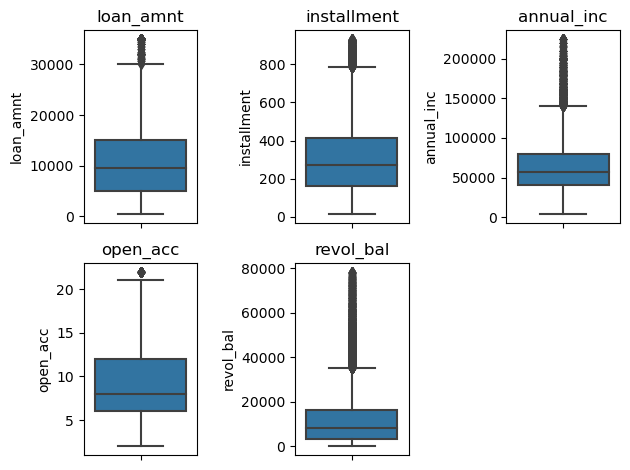

In [33]:
#Again plotting
for i, j in enumerate(LoanData[OutlierColumns]):
    plt.subplot(2,3,i+1)
    sns.boxplot(y = j, data = LoanData)
    plt.title(j)
    plt.tight_layout()
    
#Installment, annual_inc, open_acc and revol_bal - boxplots are better now - their max range has decreased. 

# Univariate Analysis

### Analyzing Categorical Columns

Categorical_columns = ['loan_status','grade','sub_grade','home_ownership','purpose','verification_status','addr_state','pub_rec_bankruptcies']

#### Loan Status

<Axes: xlabel='loan_status', ylabel='count'>

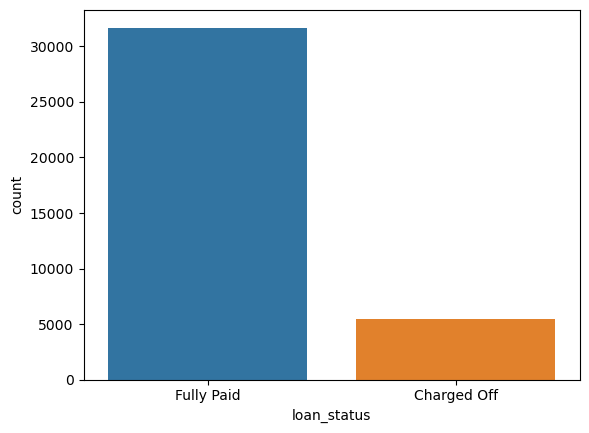

In [34]:
sns.countplot(LoanData, x='loan_status')

Charged off people are less than the fully paid people 

#### Grade & Subgrade

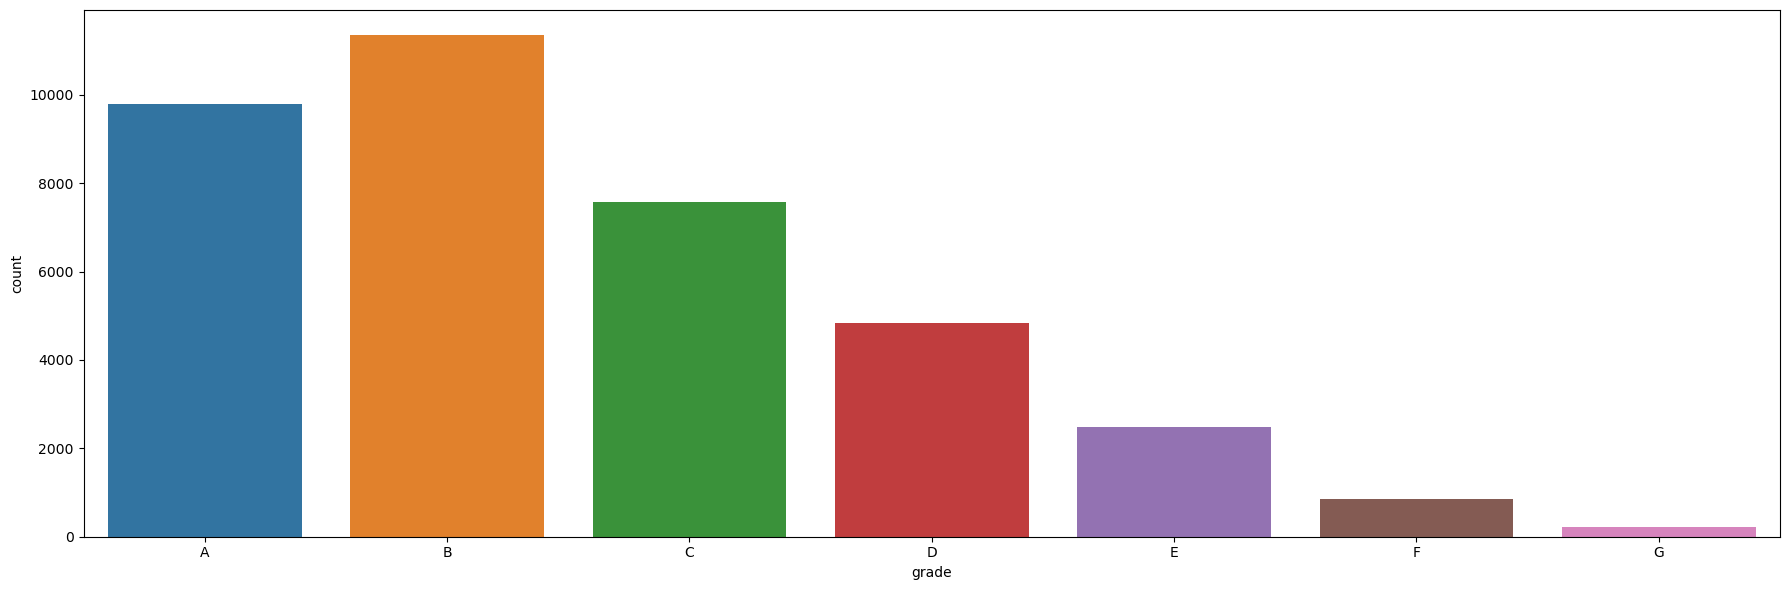

In [35]:
plt. figure(figsize=(18, 6))
sns.countplot(data=LoanData, x='grade',order=['A','B','C','D','E','F','G'])
plt.tight_layout()

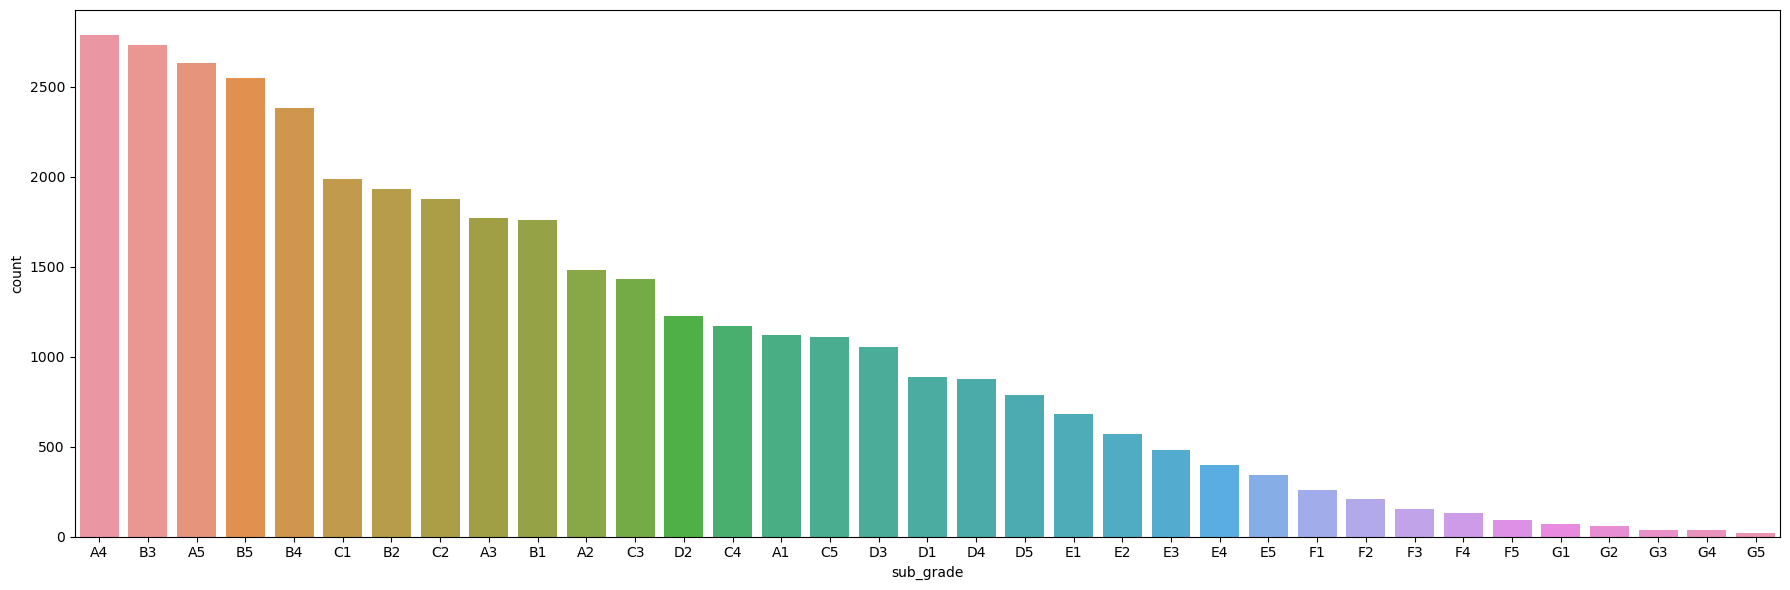

In [36]:
plt. figure(figsize=(18, 6))
sns.countplot(data=LoanData, x='sub_grade',order=LoanData['sub_grade'].value_counts().index)
plt.tight_layout()

Mostly people lie between A-C grade

#### Home Ownership & Verification Status

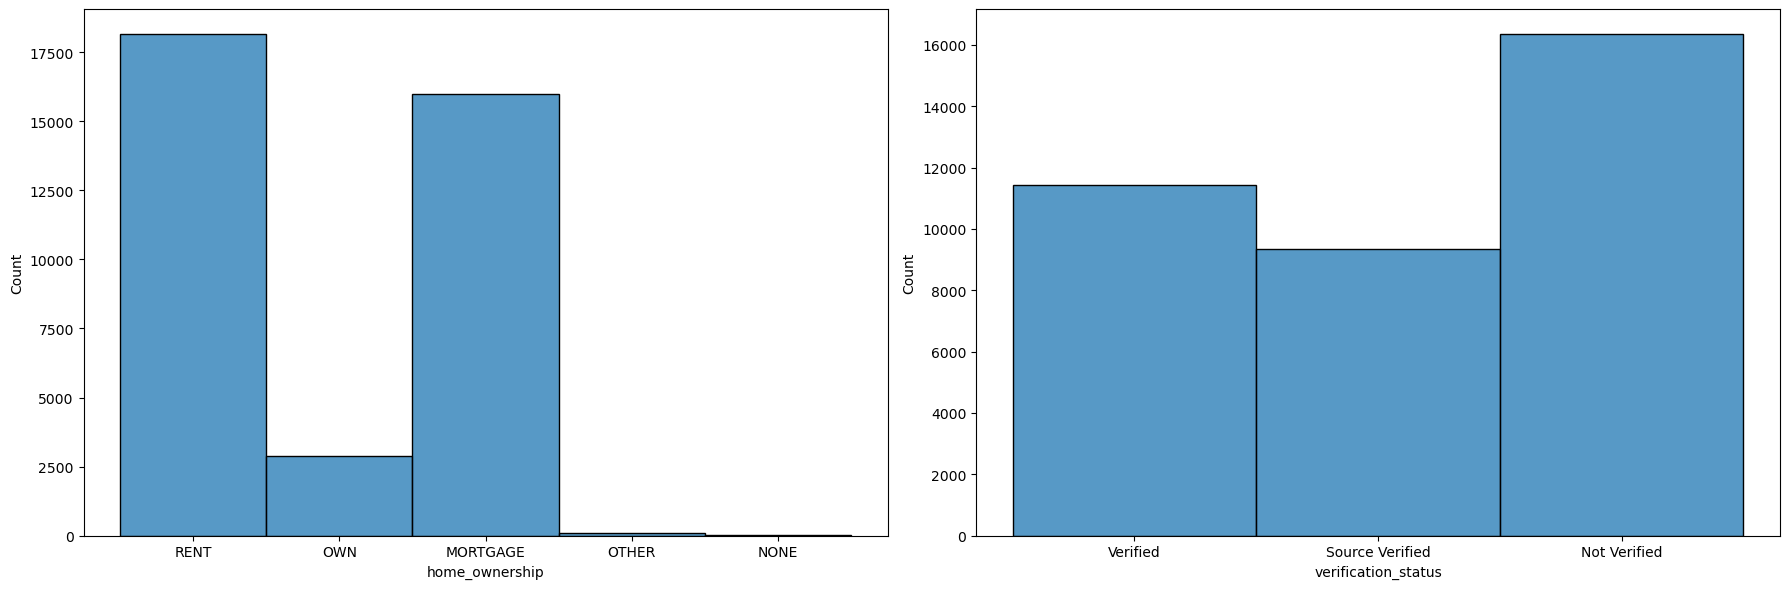

In [37]:
plt. figure(figsize=(18, 6))
for i, j in enumerate(['home_ownership','verification_status']):
    plt.subplot(1,2,i+1)
    sns.histplot(data=LoanData, x=j)
    plt.tight_layout()

Most of the people are non verified & have either Rent/Mortage during their loan. 

#### Purpose

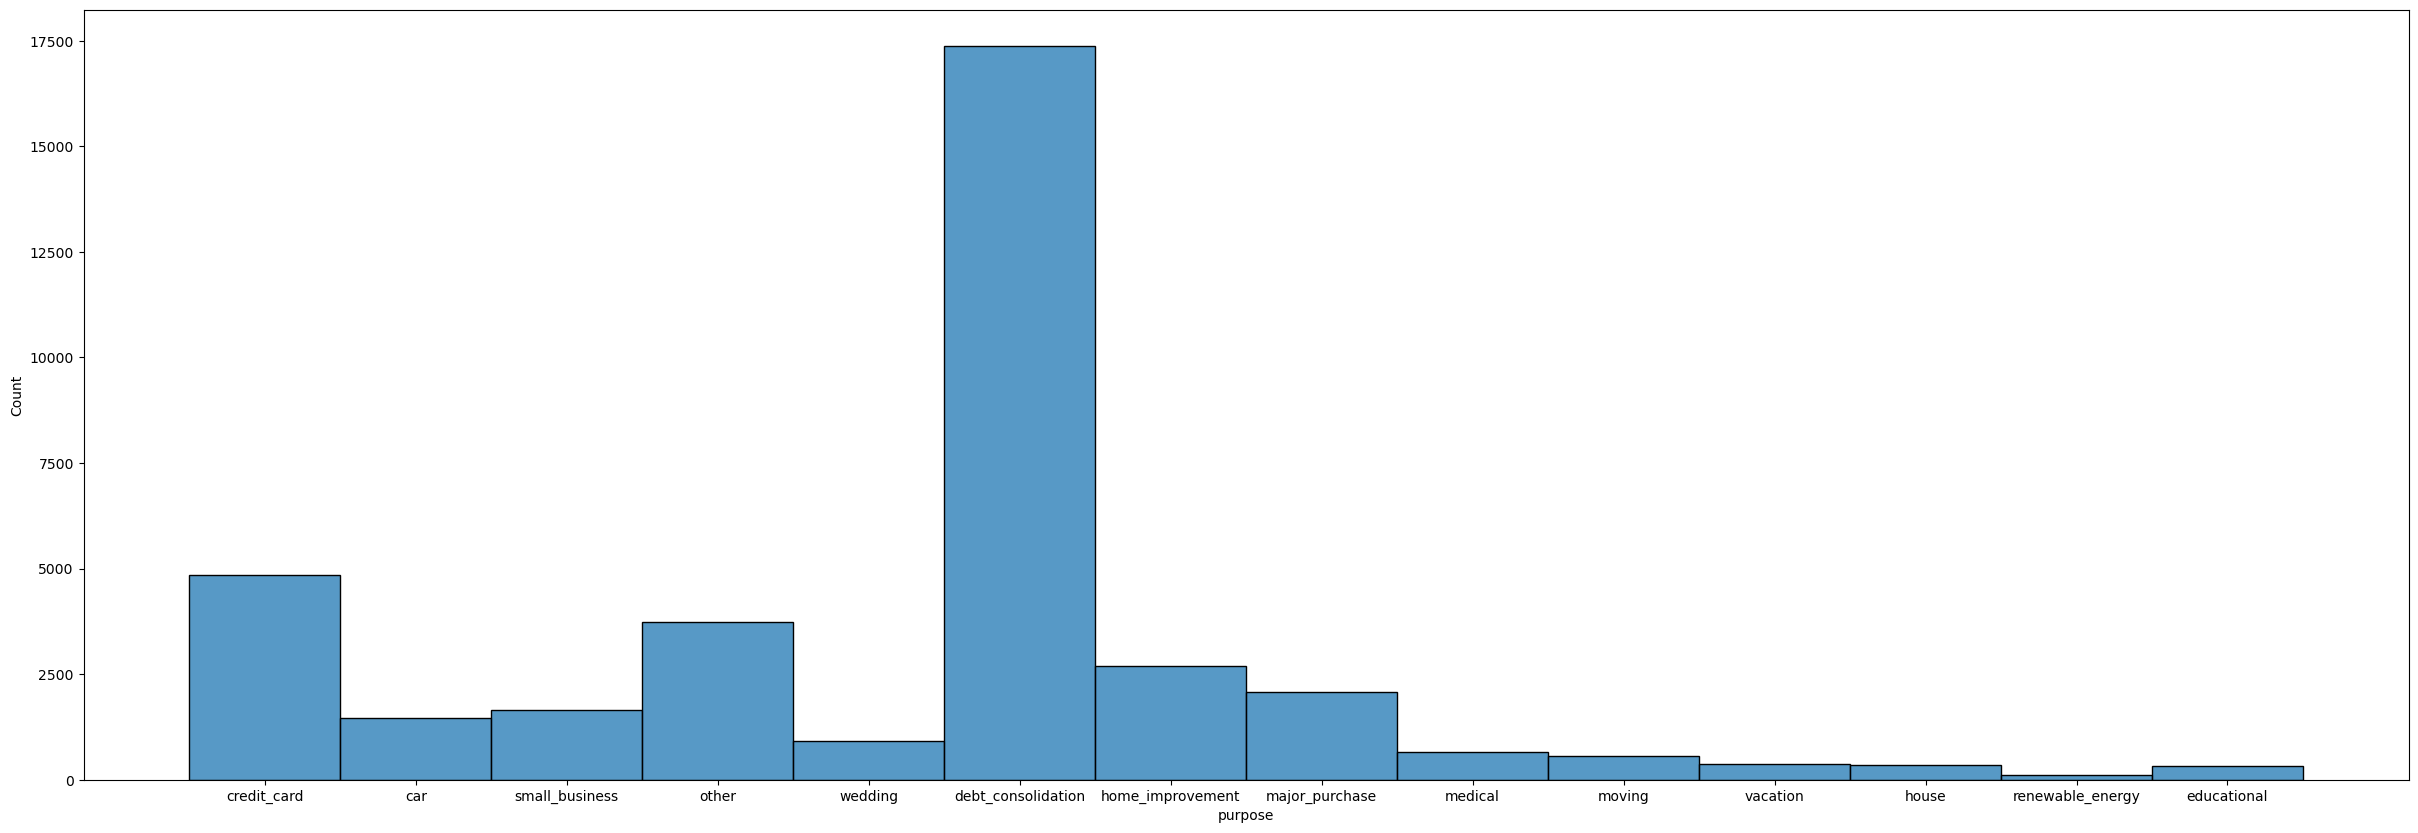

In [38]:
plt. figure(figsize=(30, 10))
sns.histplot(data=LoanData, x='purpose')
plt.show()

Mostly people have taken loan for another debt repayment

#### Address state & Public record of Backruptcies

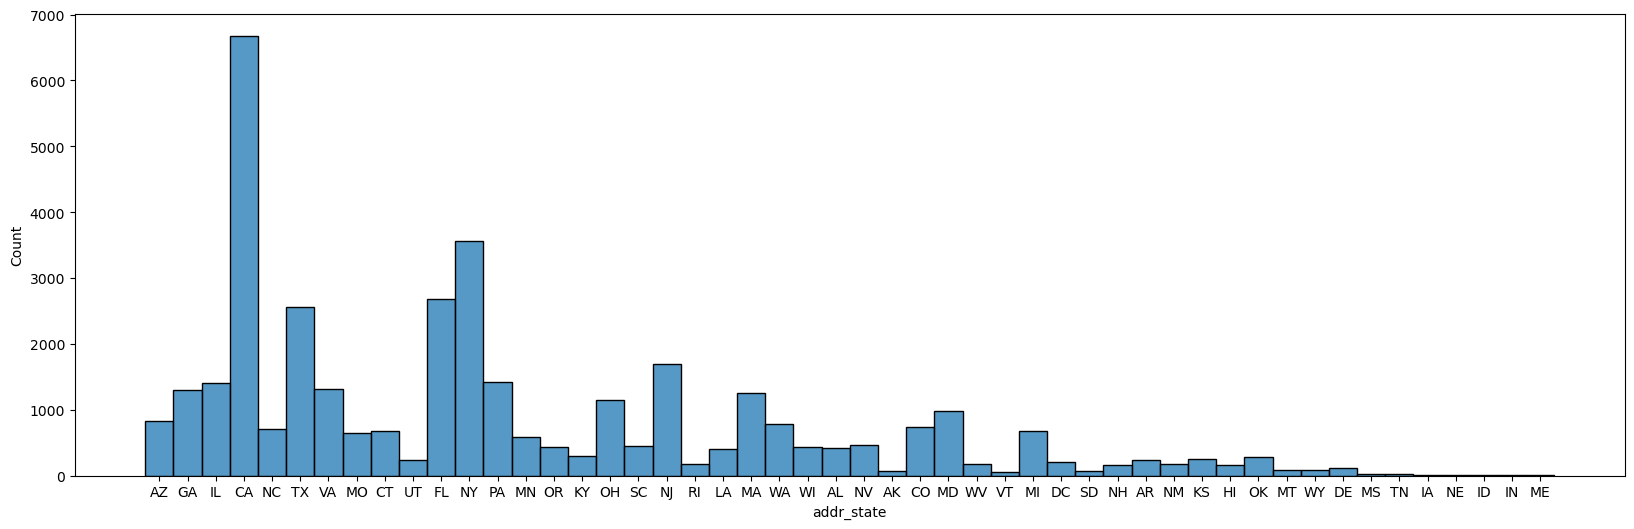

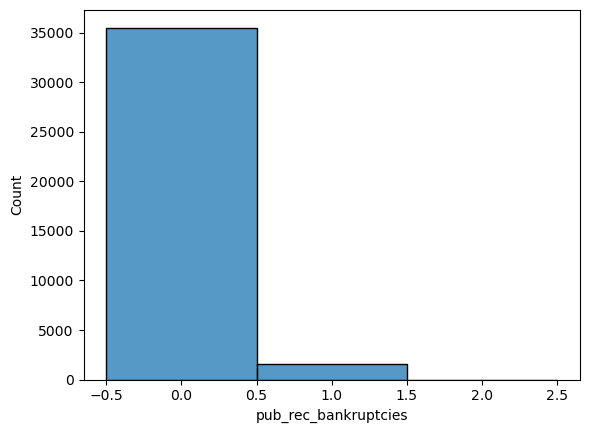

In [39]:
plt.figure(figsize=(20, 6))
for i, j in enumerate(['addr_state','pub_rec_bankruptcies']):
    sns.histplot(data=LoanData, x=j)
    plt.show()

People are from various states mainly CA, NY big cities & mostly people have 0 records for bankruptcies. 

### Analyzing Numerical Columns


numerical_columns = ['loan_amnt','term','int_rate','installment','emp_length','annual_inc','dti','delinq_2yrs','open_acc','pub_rec','revol_bal']

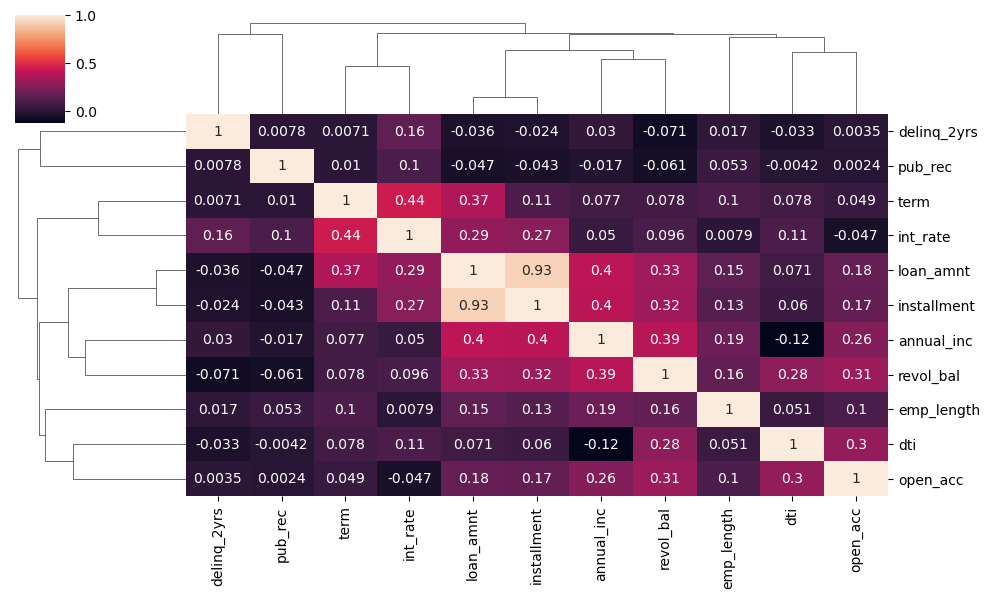

In [40]:
loan_correlation = LoanData[numerical_columns].corr()
sns.clustermap(loan_correlation,annot=True,figsize=(10, 6))
plt.show()

Observations:

1. Loan amount and Installment are highest correlated - means higher loan amount - higher installment. 
2. Loan amount annual income also have positive correlation.
3. Term and interest rate also have positive correlation.
4. Loan-amount and public record have negative correlation means inversely proportional. 


# Bivariate Analysis 

### Loan Status Vs Interest Rate & Grade

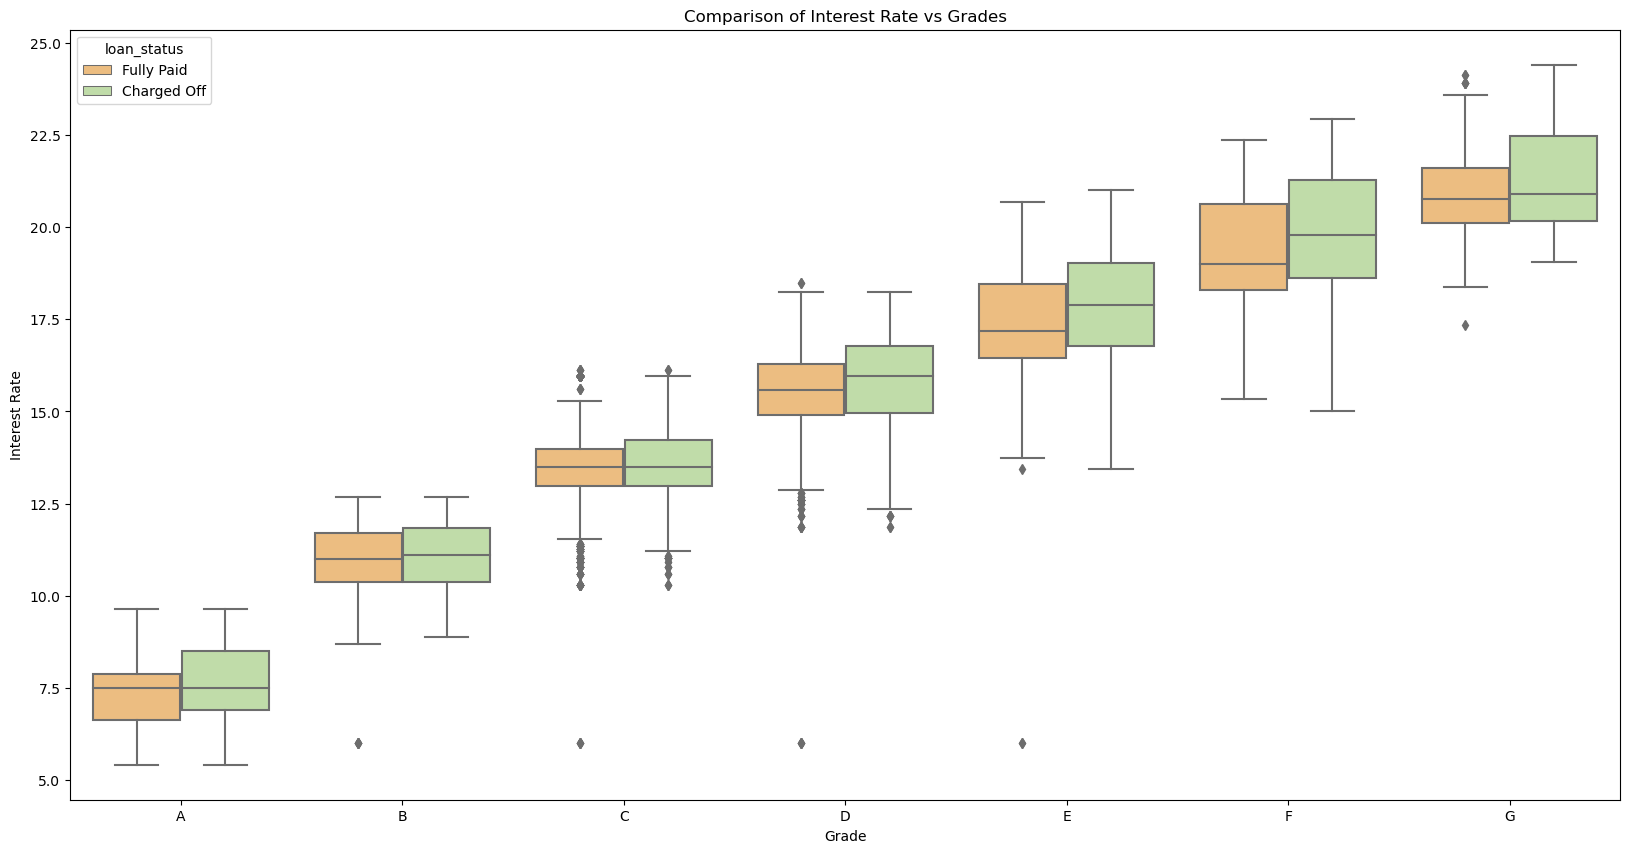

In [41]:
# Analysing co-relation on how the grades affect the rate of interest at which the loan is granted. 
plt.figure(figsize=(20,10))
sns.boxplot(data=LoanData,x='grade',y='int_rate', hue = 'loan_status', palette="Spectral", order=['A','B','C','D','E','F','G'])
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.title('Comparison of Interest Rate vs Grades')
plt.show()

The above box plotting clearly indicates the that interest rate keep on increasing as the grade decreases . We also see that E-G have wider box plots means more charge off than compared to other grades. Lets visualize better picture to confirm using percentage. 

#### Loan Status Vs Grades

In [42]:
#Now comparing grades with loan status
LoanDataGradeTemp = LoanData.groupby(['grade','loan_status']).size().reset_index(name='count')
LoanDataGradeTemp["percentage"] = LoanDataGradeTemp.groupby('grade')['count'].transform(lambda x: 100*x/x.sum())
print(LoanDataGradeTemp)

   grade  loan_status  count  percentage
0      A  Charged Off    592    6.045134
1      A   Fully Paid   9201   93.954866
2      B  Charged Off   1394   12.279774
3      B   Fully Paid   9958   87.720226
4      C  Charged Off   1312   17.315560
5      C   Fully Paid   6265   82.684440
6      D  Charged Off   1082   22.387751
7      D   Fully Paid   3751   77.612249
8      E  Charged Off    679   27.434343
9      E   Fully Paid   1796   72.565657
10     F  Charged Off    280   32.979976
11     F   Fully Paid    569   67.020024
12     G  Charged Off     75   32.751092
13     G   Fully Paid    154   67.248908


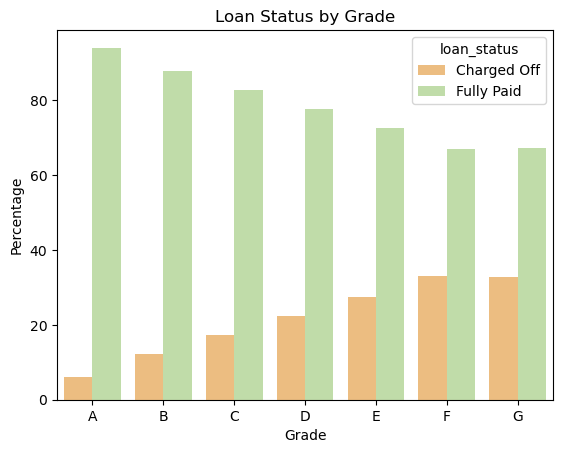

In [43]:
plt.title('Loan Status by Grade')
sns.barplot(data =LoanDataGradeTemp,x='grade', y ='percentage', hue = 'loan_status', palette="Spectral")
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.show()

We clearly see than as the customer grade decreases more the chances of being deafult. A has the low chances of defaulting and F-G has high risk.

In [44]:
#Now comparing subgrades with loan status
LoanDataSubGradeTemp = LoanData.groupby(['sub_grade','loan_status']).size().reset_index(name='count')
LoanDataSubGradeTemp["percentage"] = LoanDataSubGradeTemp.groupby('sub_grade')['count'].transform(lambda x: 100*x/x.sum())
print(LoanDataSubGradeTemp)

   sub_grade  loan_status  count  percentage
0         A1  Charged Off     30    2.676182
1         A1   Fully Paid   1091   97.323818
2         A2  Charged Off     74    4.993252
3         A2   Fully Paid   1408   95.006748
4         A3  Charged Off     99    5.583756
..       ...          ...    ...         ...
65        G3   Fully Paid     24   61.538462
66        G4  Charged Off      8   22.222222
67        G4   Fully Paid     28   77.777778
68        G5  Charged Off      5   23.809524
69        G5   Fully Paid     16   76.190476

[70 rows x 4 columns]


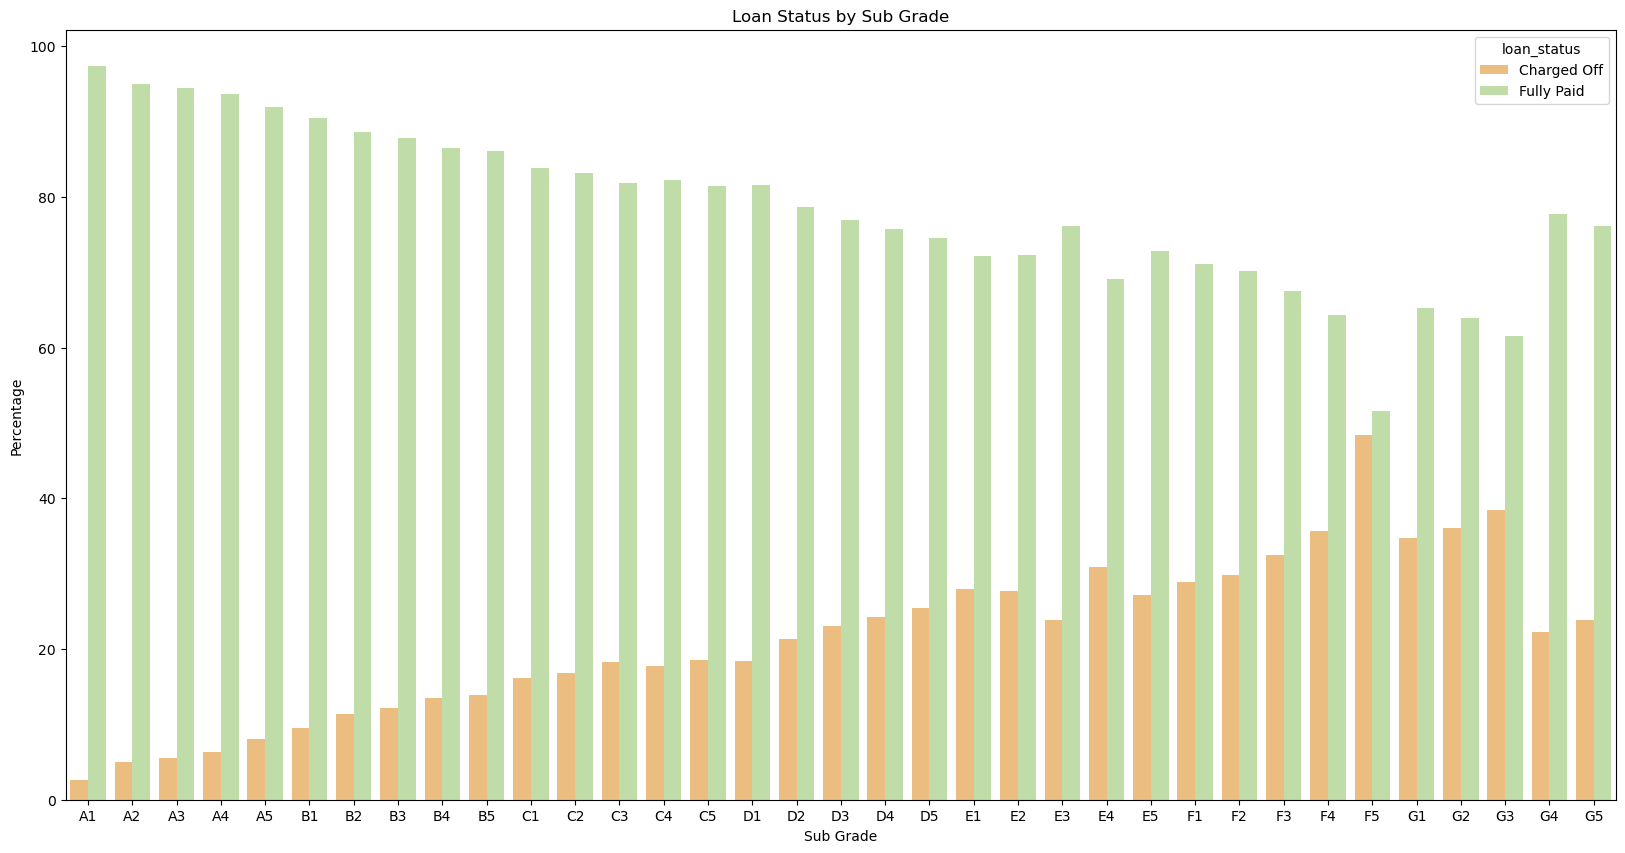

In [45]:
plt.figure(figsize=(20,10))
plt.title('Loan Status by Sub Grade')
sns.barplot(data =LoanDataSubGradeTemp,x='sub_grade', y ='percentage', hue = 'loan_status', palette="Spectral")
plt.xlabel('Sub Grade')
plt.ylabel('Percentage')
plt.show()

It is confirmed from the subgrading plot also that as grade decreases the chances of defaulting increases. 

#### Loan Status Vs Interest Rate

In [46]:
#Comparing interest rates with loan status
LoanData['IntrestRateSegments']=pd.cut(LoanData['int_rate'],[0,5,10,15,20],labels=['0-5%','5-10%','10-15%','15+%'])
LoanDataIntRateTemp = LoanData.groupby(['IntrestRateSegments','loan_status']).size().reset_index(name='count')
LoanDataIntRateTemp["percentage"] = LoanDataIntRateTemp.groupby('IntrestRateSegments')['count'].transform(lambda x: 100*x/x.sum())
print(LoanDataIntRateTemp)

  IntrestRateSegments  loan_status  count  percentage
0                0-5%  Charged Off      0         NaN
1                0-5%   Fully Paid      0         NaN
2               5-10%  Charged Off    811    6.759460
3               5-10%   Fully Paid  11187   93.240540
4              10-15%  Charged Off   2643   14.930516
5              10-15%   Fully Paid  15059   85.069484
6                15+%  Charged Off   1727   25.382128
7                15+%   Fully Paid   5077   74.617872


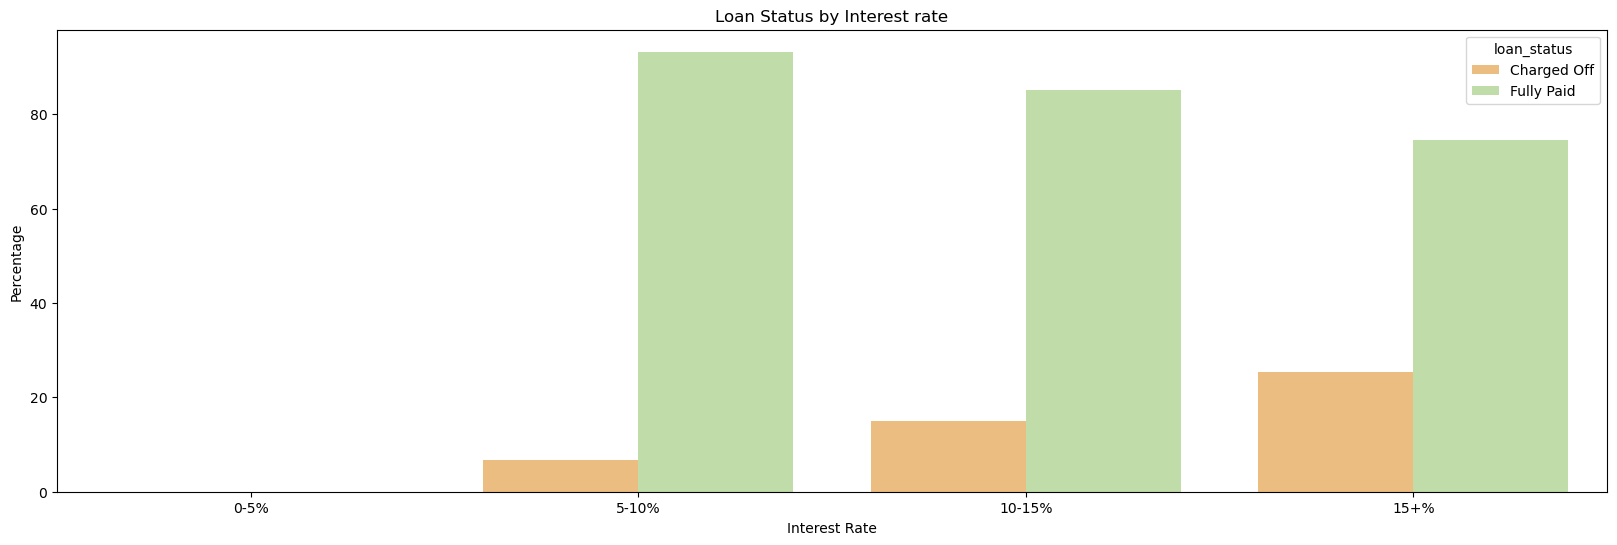

In [47]:
plt.figure(figsize=(20,6))
plt.title('Loan Status by Interest rate')
sns.barplot(data =LoanDataIntRateTemp,x='IntrestRateSegments', y ='percentage', hue = 'loan_status', palette="Spectral")
plt.xlabel('Interest Rate')
plt.ylabel('Percentage')
plt.show()

Higher the interest rate - more the chances of charge off - defaulting

### Loan status Vs Loan Amount & Purpose

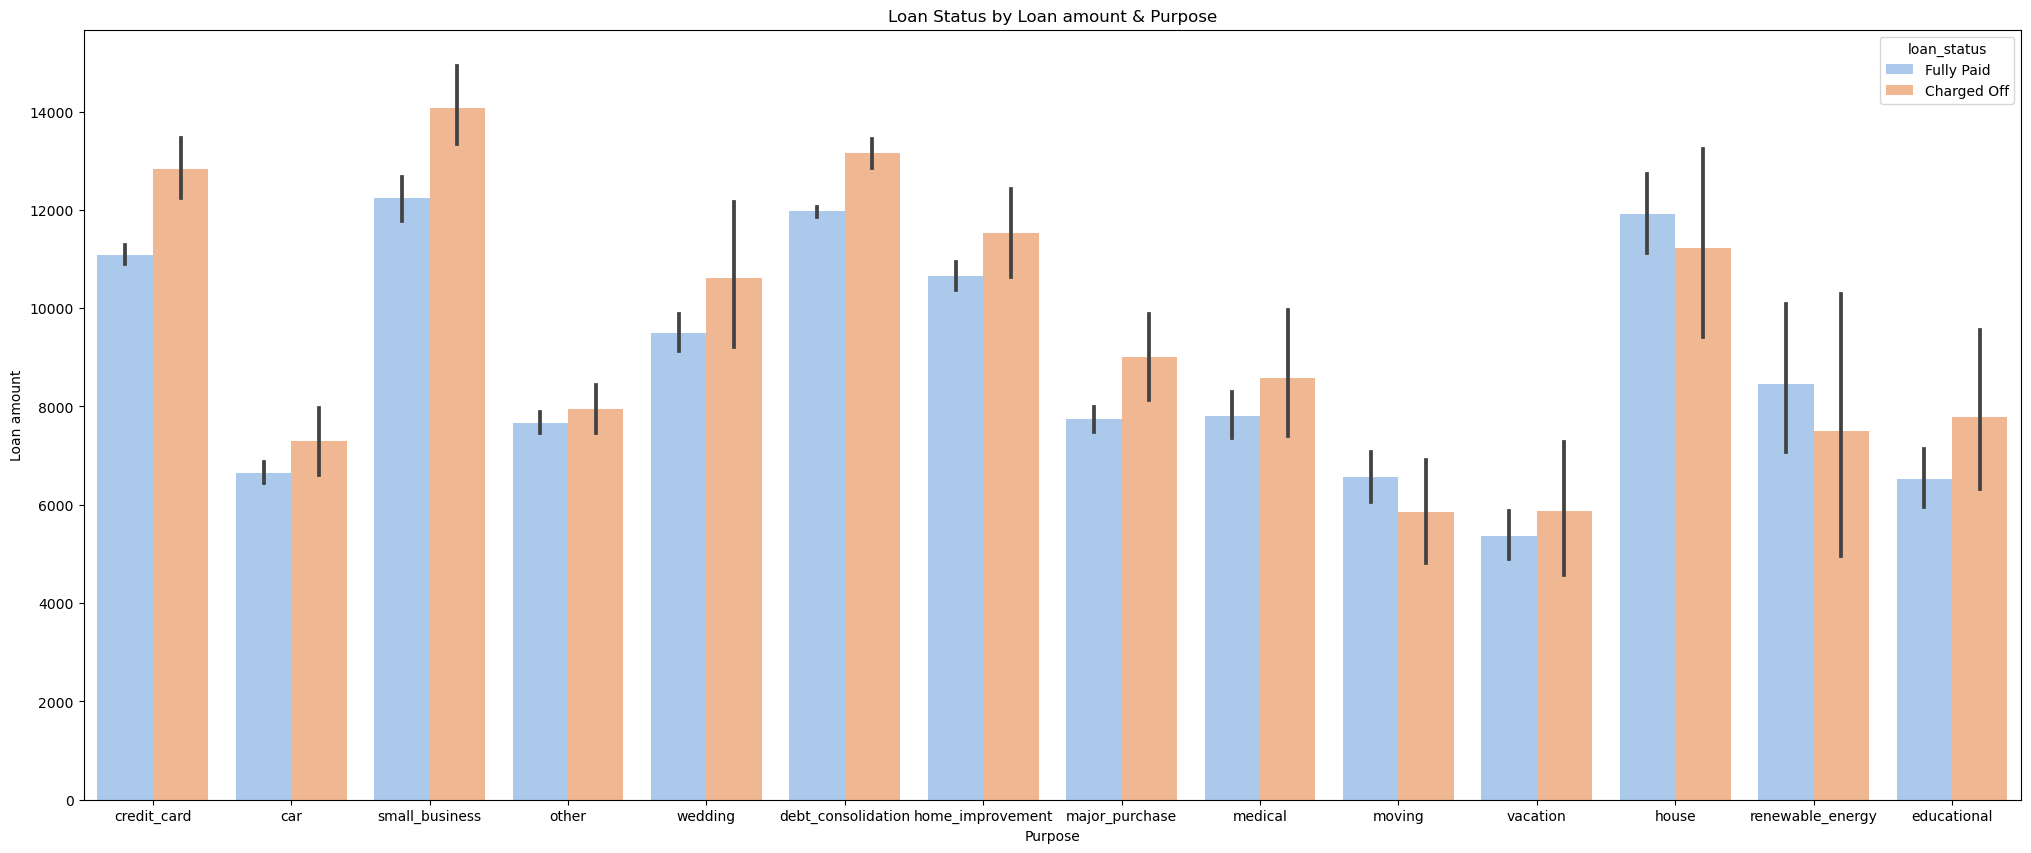

In [48]:
# Now below we will showcase different purposes and their respective loan amounts.
#Through the below information we will be able to understand what purposes attract higher amount of loans.

plt.figure(figsize=(25,10))
plt.title('Loan Status by Loan amount & Purpose')
sns.barplot(data =LoanData,x='purpose', y='loan_amnt', hue ='loan_status',palette="pastel")
plt.xlabel('Purpose')
plt.ylabel('Loan amount')
plt.show()

Customers are taking larger amount of loans for either small businesses, credit card or for debt consolidation. Also in terms of Loan status we can see that higher number of loans is being charged-off rather than being fully paid in small_business , credit cards and debt_consolidation scenarios.This shows higher risk for the bank to invest money in these 3 areas.


### Loan status Vs Loan Amount & Home ownership

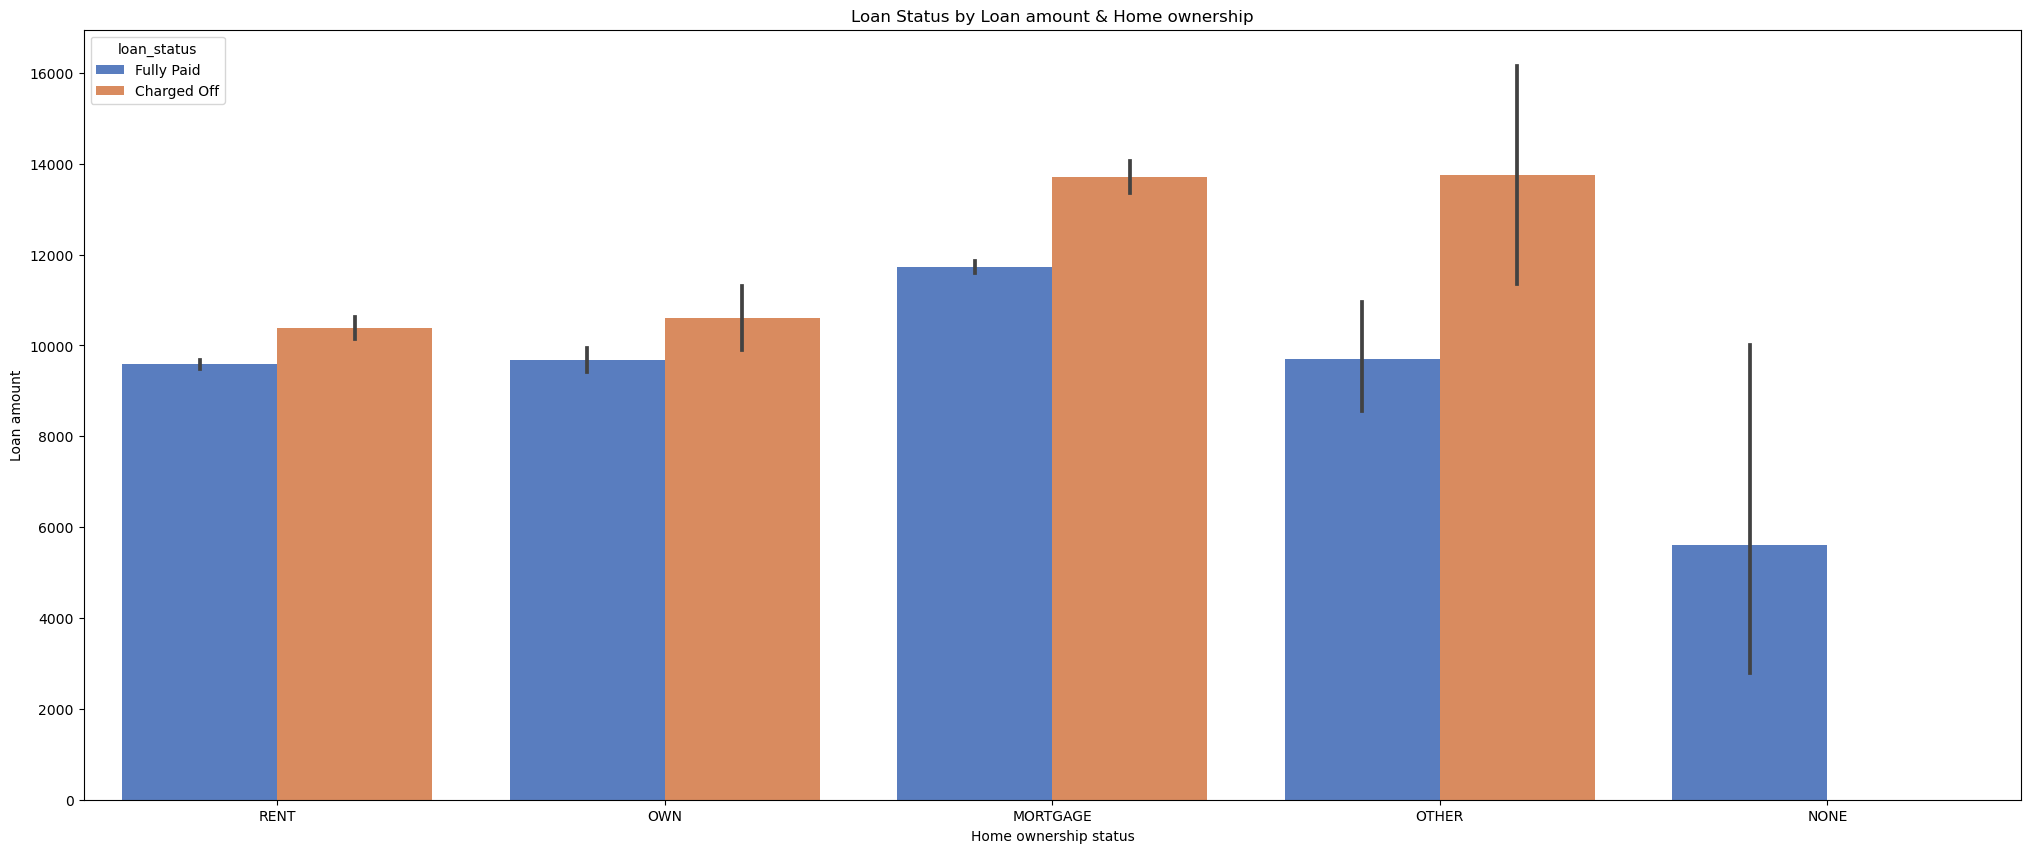

In [49]:
# Now we will show below how the home_ownership status compares with the amount of loan taken. 
#This showcases whether accomodation affects the loan status.

plt.figure(figsize=(25,10))
plt.title('Loan Status by Loan amount & Home ownership')
sns.barplot(data =LoanData,x='home_ownership', y='loan_amnt', hue ='loan_status',palette="muted")
plt.xlabel('Home ownership status')
plt.ylabel('Loan amount')
plt.show()

In [50]:
#None is wrong value it should be Other. 
LoanData['home_ownership'] = LoanData['home_ownership'].str.replace('NONE','OTHER')
print(LoanData['home_ownership'].value_counts())

home_ownership
RENT        18163
MORTGAGE    15981
OWN          2865
OTHER          99
Name: count, dtype: int64


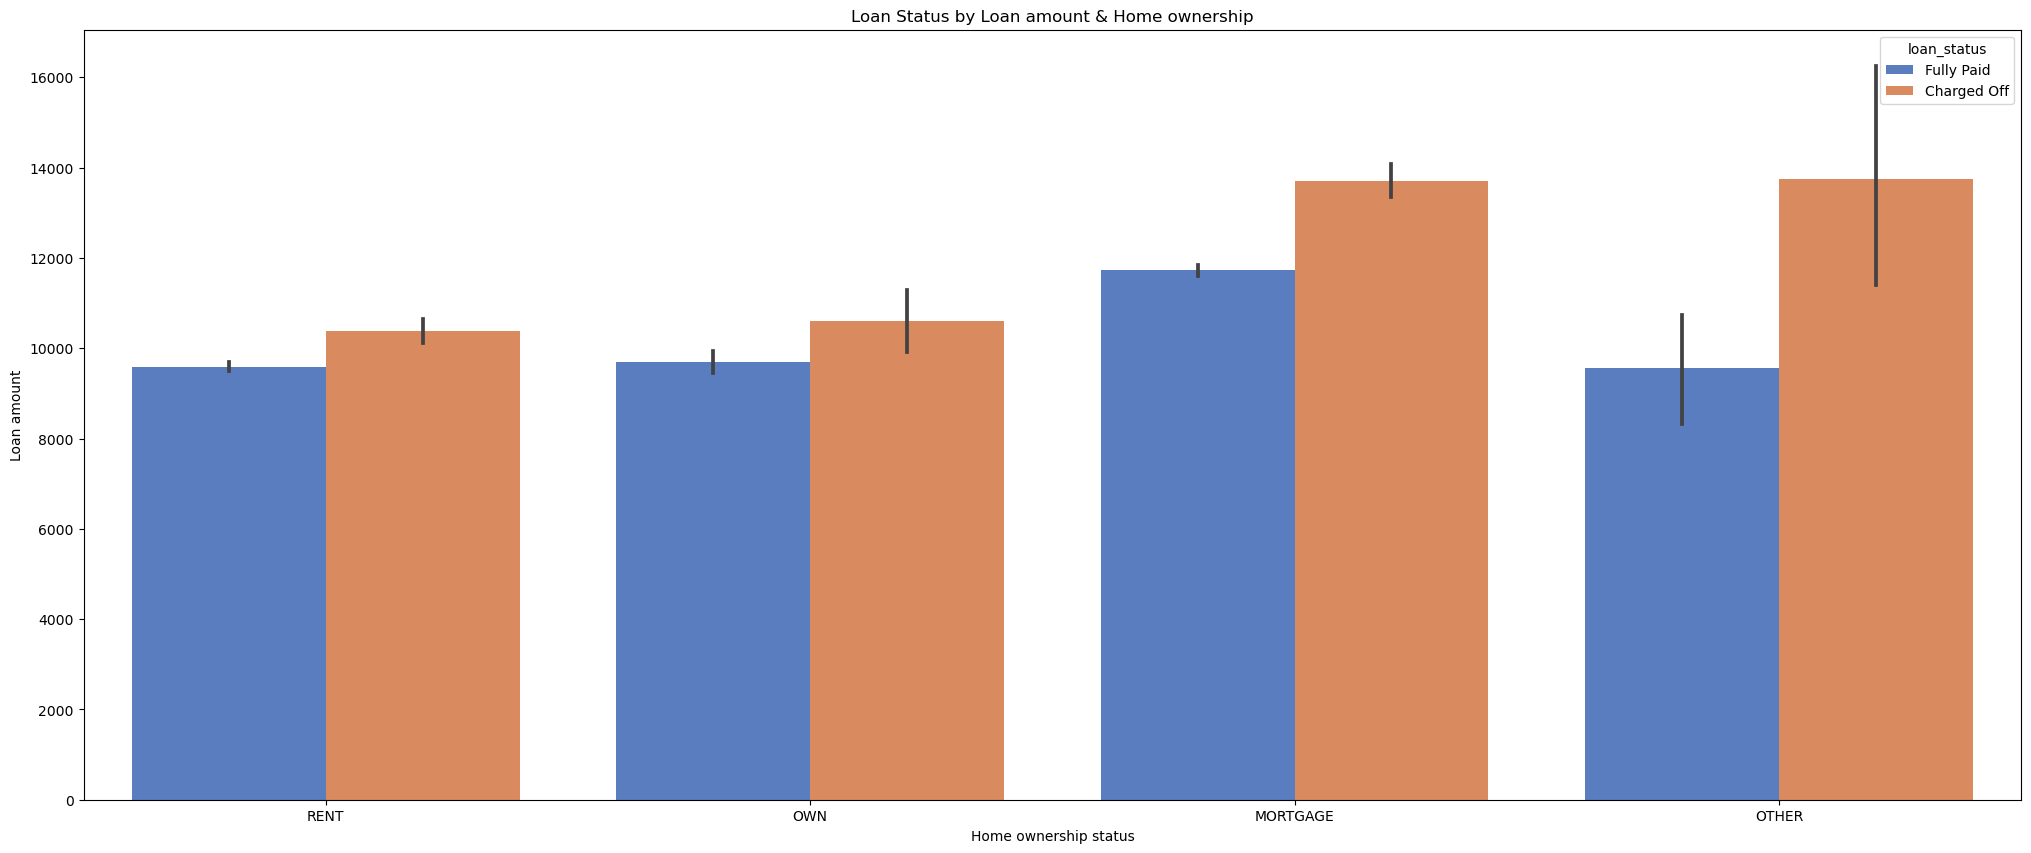

In [51]:
#Plotting again
plt.figure(figsize=(25,10))
plt.title('Loan Status by Loan amount & Home ownership')
sns.barplot(data =LoanData,x='home_ownership', y='loan_amnt', hue ='loan_status',palette="muted")
plt.xlabel('Home ownership status')
plt.ylabel('Loan amount')
plt.show()

1. Customers who have their own accomodation/house or rented accomodations are less likely to take higher amount of loans rather than the persons with ownership statuses as Mortgage or other statuses.

2. Charged-off ratio is considerably higher in cases where the accomodation is Mortgaged or either from Other sources. This also showcases that the customers living in accomodations apart from owned and rented have higher variations between their charged-off and fully paid loan bars also which means there is a higher chance of default specially with the Mortgaged accomodated persons.

### Loan status Vs Annual Income

  AnnualIncomeSegments  loan_status  count  percentage
0                0-20k  Charged Off    237   20.101781
1                0-20k   Fully Paid    942   79.898219
2               20-40k  Charged Off   1506   17.755246
3               20-40k   Fully Paid   6976   82.244754
4               40-60k  Charged Off   1707   15.295699
5               40-60k   Fully Paid   9453   84.704301
6              60k-80k  Charged Off    996   13.394298
7              60k-80k   Fully Paid   6440   86.605702
8                 80k+  Charged Off    502   11.574821
9                 80k+   Fully Paid   3835   88.425179


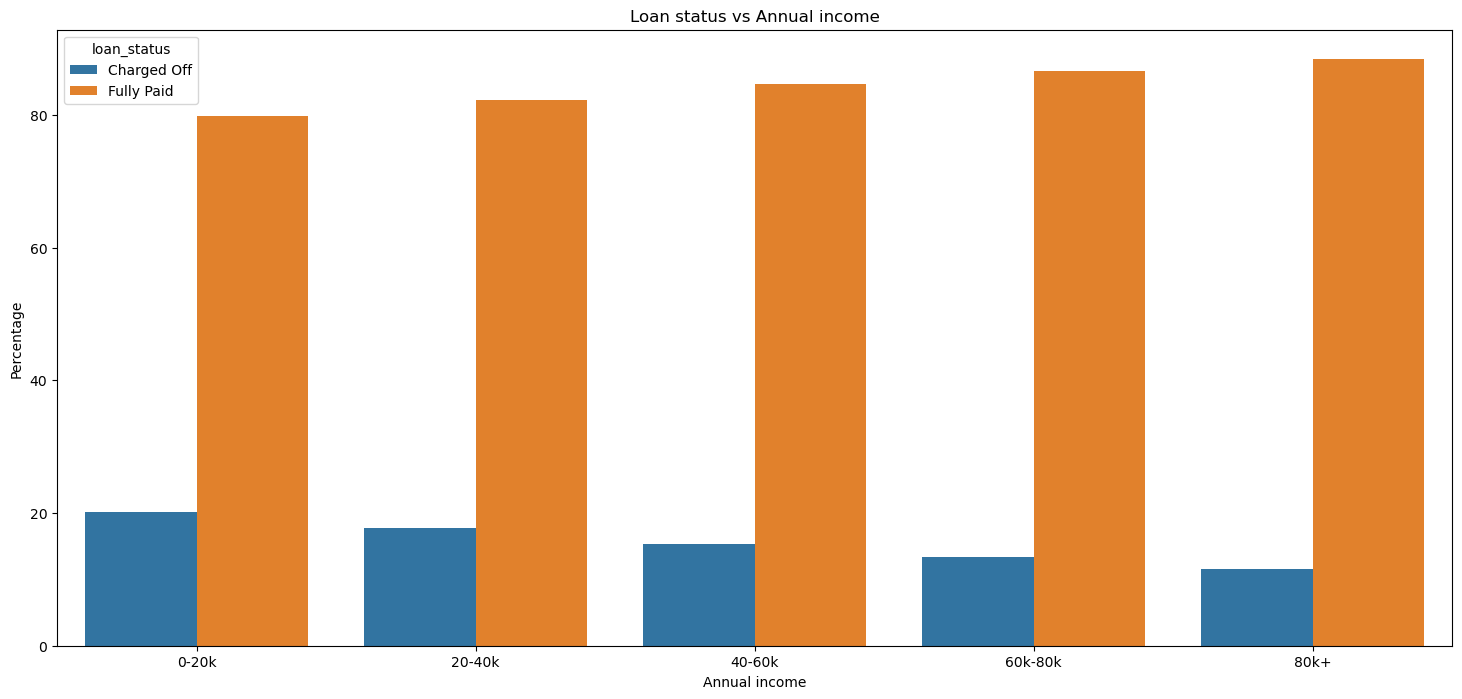

In [52]:
LoanData['AnnualIncomeSegments']=pd.cut(LoanData['annual_inc'],[0,20000,40000,60000, 80000, 100000],labels=['0-20k','20-40k','40-60k','60k-80k','80k+'])
LoanDataAnnualIncTemp = LoanData.groupby(['AnnualIncomeSegments','loan_status']).size().reset_index(name='count')
LoanDataAnnualIncTemp["percentage"] = LoanDataAnnualIncTemp.groupby('AnnualIncomeSegments')['count'].transform(lambda x: 100*x/x.sum())
print(LoanDataAnnualIncTemp)

plt.figure(figsize=(18,8))
sns.barplot(x='AnnualIncomeSegments', y='percentage', hue="loan_status", data=LoanDataAnnualIncTemp)
plt.title('Loan status vs Annual income')
plt.xlabel('Annual income')
plt.ylabel('Percentage')
plt.show()



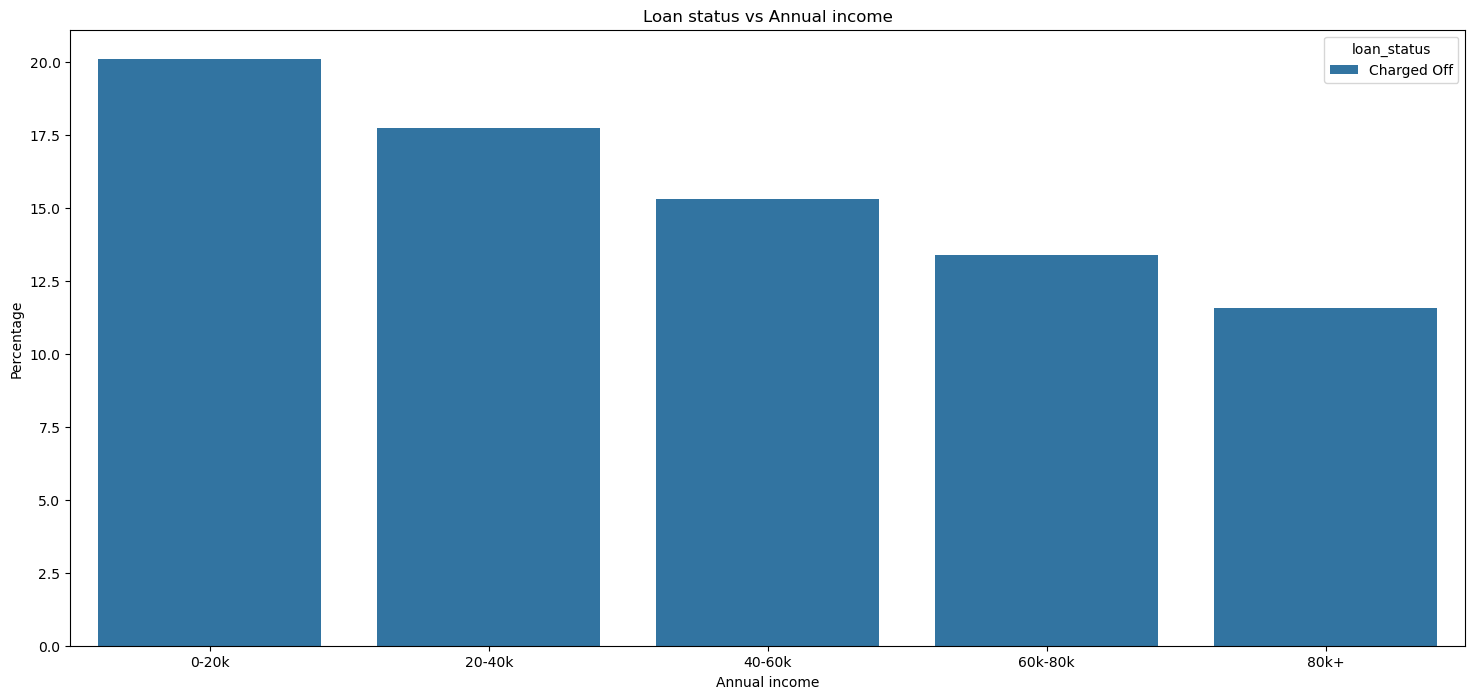

In [53]:
#Only filtering Charged off from loan status and then plotting again for better visibility

AnnualIncfiltered_data = LoanDataAnnualIncTemp[LoanDataAnnualIncTemp['loan_status'] == 'Charged Off']

plt.figure(figsize=(18,8))
sns.barplot(x='AnnualIncomeSegments', y='percentage', hue="loan_status", data=AnnualIncfiltered_data)
plt.title('Loan status vs Annual income')
plt.xlabel('Annual income')
plt.ylabel('Percentage')
plt.show()

So we can see as annual income increases - the risk of defaulting decreases

### Loan status Vs Employed length

    emp_length  loan_status  count  percentage
0            0  Charged Off    221   22.077922
1            0   Fully Paid    780   77.922078
2            1  Charged Off   1061   14.216803
3            1   Fully Paid   6402   85.783197
4            2  Charged Off    548   13.220748
5            2   Fully Paid   3597   86.779252
6            3  Charged Off    545   13.970777
7            3   Fully Paid   3356   86.029223
8            4  Charged Off    439   13.541024
9            4   Fully Paid   2803   86.458976
10           5  Charged Off    444   14.401557
11           5   Fully Paid   2639   85.598443
12           6  Charged Off    297   14.102564
13           6   Fully Paid   1809   85.897436
14           7  Charged Off    249   15.109223
15           7   Fully Paid   1399   84.890777
16           8  Charged Off    198   14.463112
17           8   Fully Paid   1171   85.536888
18           9  Charged Off    156   13.131313
19           9   Fully Paid   1032   86.868687
20          1

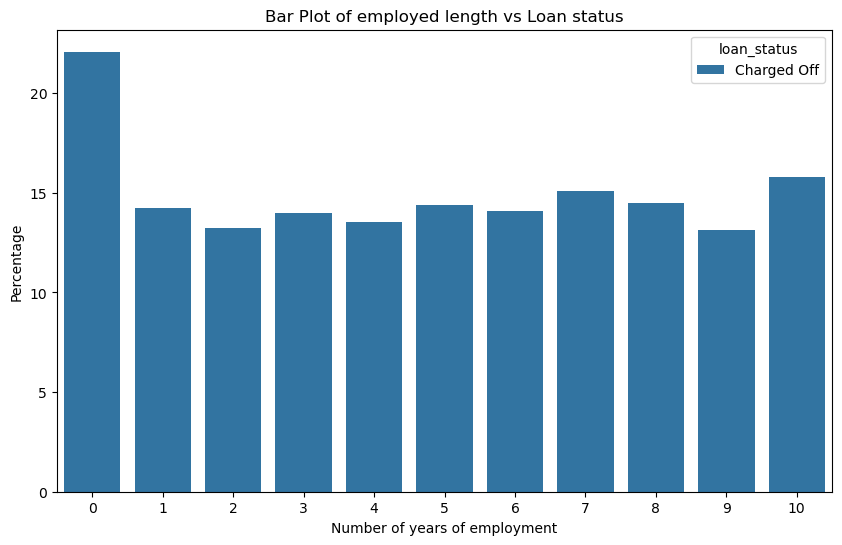

In [54]:
# Plotting the graph against length for which the person is employed & loan status
LoanDataEmpLengthTemp = LoanData.groupby(['emp_length','loan_status']).size().reset_index(name='count')
LoanDataEmpLengthTemp["percentage"] = LoanDataEmpLengthTemp.groupby('emp_length')['count'].transform(lambda x: 100*x/x.sum())
print(LoanDataEmpLengthTemp)

EmpLengthfiltered_data = LoanDataEmpLengthTemp[LoanDataEmpLengthTemp['loan_status'] == 'Charged Off']

plt.figure(figsize=(10, 6))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=EmpLengthfiltered_data)
plt.xlabel('Number of years of employment')
plt.ylabel('Percentage')
plt.title('Bar Plot of employed length vs Loan status')
plt.show()

The people who are unemployed are more prone to deafult on their loan than the people who are employed. 

### Loan status Vs Verification Status

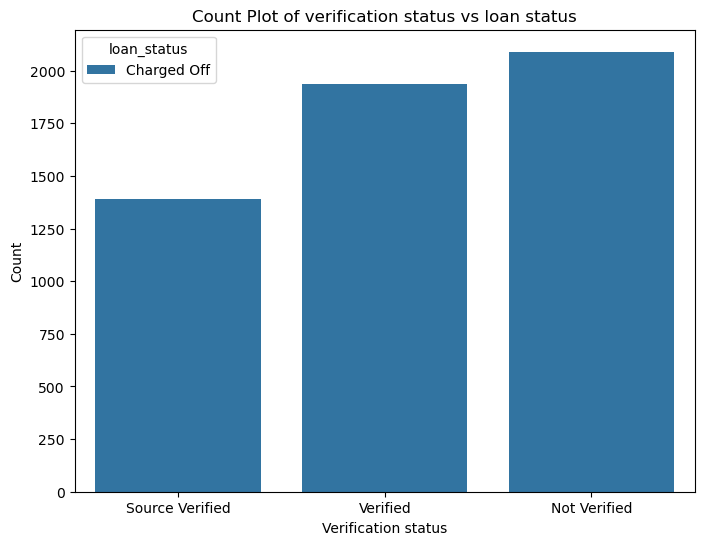

In [55]:
# The below barplot shows the co-relation between the loan amount and the verification status.

plt.figure(figsize=(8, 6))
sns.countplot(x='verification_status', hue='loan_status', data=LoanData[LoanData['loan_status'] == 'Charged Off'])
plt.xlabel('Verification status')
plt.ylabel('Count')
plt.title('Count Plot of verification status vs loan status')
plt.show()

People who are not verified are directly proportional to being charge off

### Loan status Vs Term

   term  loan_status  count  percentage
0    36  Charged Off   3105   11.084931
1    36   Fully Paid  24906   88.915069
2    60  Charged Off   2309   25.381994
3    60   Fully Paid   6788   74.618006


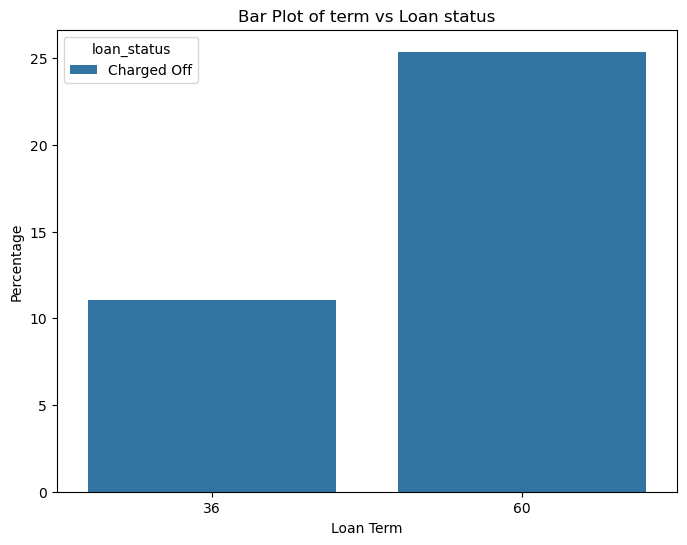

In [56]:
LoanDataTermTemp = LoanData.groupby(['term','loan_status']).size().reset_index(name='count')
LoanDataTermTemp["percentage"] = LoanDataTermTemp.groupby('term')['count'].transform(lambda x: 100*x/x.sum())
print(LoanDataTermTemp)

Termfiltered_data = LoanDataTermTemp[LoanDataTermTemp['loan_status'] == 'Charged Off']

plt.figure(figsize=(8, 6))
sns.barplot(x='term', y = 'percentage', hue='loan_status', data=Termfiltered_data)
plt.xlabel('Loan Term')
plt.ylabel('Percentage')
plt.title('Bar Plot of term vs Loan status')
plt.show()

we can see clearly people taking loan for larger duration are defaulting more than the smaller ones

### Loan status Vs DTI (Debt to income ratio)

  DTISegments  loan_status  count  percentage
0         0-5  Charged Off    571   12.224363
1         0-5   Fully Paid   4100   87.775637
2        5-10  Charged Off    971   12.833730
3        5-10   Fully Paid   6595   87.166270
4       10-15  Charged Off   1361   14.609274
5       10-15   Fully Paid   7955   85.390726
6       15-20  Charged Off   1321   15.620196
7       15-20   Fully Paid   7136   84.379804
8         20+  Charged Off   1076   17.014548
9         20+   Fully Paid   5248   82.985452


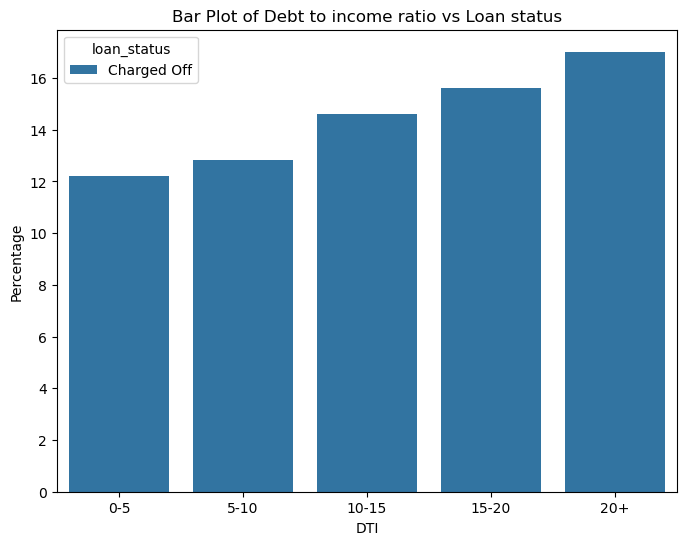

In [57]:
LoanData['DTISegments']=pd.cut(LoanData['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','20+'])
LoanDataDtiTemp = LoanData.groupby(['DTISegments','loan_status']).size().reset_index(name='count')
LoanDataDtiTemp["percentage"] = LoanDataDtiTemp.groupby('DTISegments')['count'].transform(lambda x: 100*x/x.sum())
print(LoanDataDtiTemp)

dtifiltered_data = LoanDataDtiTemp[LoanDataDtiTemp['loan_status'] == 'Charged Off']

plt.figure(figsize=(8, 6))
sns.barplot(x='DTISegments', y = 'percentage', hue='loan_status', data=dtifiltered_data)
plt.xlabel('DTI')
plt.ylabel('Percentage')
plt.title('Bar Plot of Debt to income ratio vs Loan status')
plt.show()

People with High DTI are prone to defaulting

# Summary

## Process

1: Data is first observed and analysed through human intelligence and columns are undesrtood with the help of data dictionary & basic analysis is done in excel. 

2: Data is then consumed through code via various libraries available in Python such as Numpy and Pandas and data is converted into Data frames which are then subsequently used for data analysis.

3: Data is throughly cleansed , standardized and normalized using various techniques available in the libraries offered by Python. E.g. columns and rows with lot of missing values or irrelevant data are deleted & values are standardised in format for better analysis.

4: **Univariate analysis:** The data analysis is perfomed on each column in the data so as to understand & derive useful trends from data.
    
    a: One by one analysis of variables and plotting of graphs and plots to find out their counts vs charged-off and fully paid status. 
    
	b: Deriving critical / useful information out of these plottings and graphical analysis that can be utilised further for segmented and bivariate analysis that follows in the next section. 
		
5: **Bivariate analysis**

	a: Deriving critical information by comparing two or more columns against Loan status so as to understand the trend between the Charged-off and fully paid statuses.
  
	b: Plotting of graphs and plots to understand the risk factors for the bank by idenfying various critical touch points and comparing them against the loan status. Clearly demarcating the potential defaulter scenarios based on the data and helping the bank in decision making process. 

# Final Outcome

## Critical factors that should affect the decision making process of the bank

1: Grades & Subgrade

2: Interest rates

3: Purpose

4: Home ownership

5: Annual income 

6: Debt to Income ratio

7: Duration of loan

8: Verification status

## Recommendations to Bank

1: People having **higher grades e.g. A being higher than B,C,D have lesser chances of defaulting** and can be seen as a profitable strata of loan takers.

2: People getting loans at **higher rates of interest (more 10%)** are at a **greater chance of defaulting**. Hence can be identified as a potential risk for the banks. 

3: People **living in Mortgaged and other sources** are **more likely to default** rather than those having their own accommodations or rented ones. 

4: People having a **higher annual income (mostly 40K+) are less likely to default** and hence can be put in the green zone for the bank while allocating loans. 

5: People that are **employed are less likely to default**. 

6: As the **duration (term) of the loan increases the risk of loan defaulting** also increases hence the bank can take a note of this.

7: The bank should always **grant loans to properly verified people** as it was seen during this exercise that the people with **“NOT Verified” status were the most risky ones** as they had the highest charged-off ratios.

8: The bank should be cautious of people **purpose for debt consolidation, small buisnesses or credit card payments as risky & more prone to defaulting**